In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import time
from pprint import pprint
from api_keys import api_key
from citipy import citipy

## Data Analysis
1. Temperatures do increase and become more uniformly higher the closer one gets to the equator. This difference is less pronounced when moving from the Southern Hemisphere toward the equator, with the time of year being a key factor - that part of the Earth is titled toward the sun at the moment, making it summer there.
2. Being at or very near to the equator appears to mean more uniformly high humidity, although high humidity is seen elsewhere as well.
3. Humidity and cloudiness percentage do not appear to be related to proximity to the equator.
(Note - There appears to be an error in the data frame, unless humidity of nearly 300 percent is actually possible.)

In [2]:
lats_lngs = []
cities = []

lat = np.random.uniform(low=-90.0, high=90.0, size=1600)
lng = np.random.uniform(low=-180.0, high=180.0, size=1600)
lats_lngs = zip(lat, lng)

for lat_lng in lats_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    if city not in cities:
        cities.append(city)
        
print(len(cities))

625


In [3]:
weather_df = pd.DataFrame()
weather_df["City"] = ""
weather_df

,City


In [4]:
x = pd.Series(cities)

In [5]:
weather_df["City"] = x.values
weather_df.head()

,City
0,karamay
1,flin flon
2,upernavik
3,westport
4,butaritari


In [6]:
weather_df["Latitude"] = ""
weather_df["Temperature"] = ""
weather_df["Humidity"] = ""
weather_df["Cloudiness"] = ""
weather_df["Wind Speed"] = ""

In [7]:
weather_df.head()

,City,Latitude,Temperature,Humidity,Cloudiness,Wind Speed
0,karamay,,,,,
1,flin flon,,,,,
2,upernavik,,,,,
3,westport,,,,,
4,butaritari,,,,,


In [9]:
units = "imperial"
n = 0

for index, row in weather_df.iterrows():
    search_url = "http://api.openweathermap.org/data/2.5/weather?"
    city = row["City"]
    n = n + 1
    info = requests.get(search_url + "q=" + f"{city}" + "&units=" + units + "&APPID=" + api_key).json()
    print("Getting weather for city No. " + str(n) + f": {city}.")
    try:
        weather_df.loc[index, "Latitude"] = info['coord']['lat']
    except(KeyError):
        print(f"The latitude is missing for {city}.")
    try:
        weather_df.loc[index, "Temperature"] = info['main']['temp']
    except(KeyError):
        print(f"The temperature is missing for {city}.")
    try:
        weather_df.loc[index, "Humidity"] = info['main']['humidity']
    except(KeyError):
        print(f"The humidity is missing for {city}.")
    try:
        weather_df.loc[index, "Cloudiness"] = info['clouds']['all']
    except(KeyError):
        print(f"The cloudiness is missing for {city}.")
    try:
        weather_df.loc[index, "Wind Speed"] = info['wind']['speed'] 
    except(KeyError):
        print(f"The wind speed is missing for {city}.")


weather_df.head()

Getting weather for city No. 1: karamay.
The latitude is missing for karamay.
The temperature is missing for karamay.
The humidity is missing for karamay.
The cloudiness is missing for karamay.
The wind speed is missing for karamay.
Getting weather for city No. 2: flin flon.
Getting weather for city No. 3: upernavik.
Getting weather for city No. 4: westport.
Getting weather for city No. 5: butaritari.
Getting weather for city No. 6: yenagoa.
Getting weather for city No. 7: aswan.
Getting weather for city No. 8: atuona.
Getting weather for city No. 9: bathsheba.
Getting weather for city No. 10: platteville.
Getting weather for city No. 11: cape town.
Getting weather for city No. 12: puerto ayora.
Getting weather for city No. 13: saposoa.
Getting weather for city No. 14: busselton.
Getting weather for city No. 15: rikitea.
Getting weather for city No. 16: mys shmidta.
The latitude is missing for mys shmidta.
The temperature is missing for mys shmidta.
The humidity is missing for mys shmi

Getting weather for city No. 122: umm kaddadah.
Getting weather for city No. 123: vaitupu.
The latitude is missing for vaitupu.
The temperature is missing for vaitupu.
The humidity is missing for vaitupu.
The cloudiness is missing for vaitupu.
The wind speed is missing for vaitupu.
Getting weather for city No. 124: funtua.
Getting weather for city No. 125: vardo.
Getting weather for city No. 126: severo-kurilsk.
Getting weather for city No. 127: mount gambier.
Getting weather for city No. 128: ponta do sol.
Getting weather for city No. 129: vilhena.
Getting weather for city No. 130: port blair.
Getting weather for city No. 131: korla.
The latitude is missing for korla.
The temperature is missing for korla.
The humidity is missing for korla.
The cloudiness is missing for korla.
The wind speed is missing for korla.
Getting weather for city No. 132: hobyo.
Getting weather for city No. 133: thompson.
Getting weather for city No. 134: nkowakowa.
Getting weather for city No. 135: yellowknife

Getting weather for city No. 256: aflu.
The latitude is missing for aflu.
The temperature is missing for aflu.
The humidity is missing for aflu.
The cloudiness is missing for aflu.
The wind speed is missing for aflu.
Getting weather for city No. 257: praia.
Getting weather for city No. 258: fukue.
Getting weather for city No. 259: umirim.
Getting weather for city No. 260: talnakh.
Getting weather for city No. 261: miandrivazo.
Getting weather for city No. 262: tacuarembo.
Getting weather for city No. 263: aluksne.
Getting weather for city No. 264: airai.
Getting weather for city No. 265: tuktoyaktuk.
Getting weather for city No. 266: calabozo.
Getting weather for city No. 267: umm lajj.
Getting weather for city No. 268: biasca.
Getting weather for city No. 269: ocampo.
Getting weather for city No. 270: labutta.
The latitude is missing for labutta.
The temperature is missing for labutta.
The humidity is missing for labutta.
The cloudiness is missing for labutta.
The wind speed is missin

Getting weather for city No. 384: egvekinot.
Getting weather for city No. 385: colac.
Getting weather for city No. 386: sobolevo.
Getting weather for city No. 387: krutinka.
Getting weather for city No. 388: neuquen.
Getting weather for city No. 389: nishihara.
Getting weather for city No. 390: doha.
Getting weather for city No. 391: nemuro.
Getting weather for city No. 392: kaspiysk.
Getting weather for city No. 393: mynay.
Getting weather for city No. 394: kuche.
The latitude is missing for kuche.
The temperature is missing for kuche.
The humidity is missing for kuche.
The cloudiness is missing for kuche.
The wind speed is missing for kuche.
Getting weather for city No. 395: san felipe.
Getting weather for city No. 396: semibratovo.
Getting weather for city No. 397: grand river south east.
The latitude is missing for grand river south east.
The temperature is missing for grand river south east.
The humidity is missing for grand river south east.
The cloudiness is missing for grand ri

Getting weather for city No. 530: benguela.
Getting weather for city No. 531: luderitz.
Getting weather for city No. 532: tacna.
Getting weather for city No. 533: turukhansk.
Getting weather for city No. 534: tual.
Getting weather for city No. 535: launceston.
Getting weather for city No. 536: bogande.
Getting weather for city No. 537: belize.
The latitude is missing for belize.
The temperature is missing for belize.
The humidity is missing for belize.
The cloudiness is missing for belize.
The wind speed is missing for belize.
Getting weather for city No. 538: mozarlandia.
Getting weather for city No. 539: marsa matruh.
Getting weather for city No. 540: metro.
Getting weather for city No. 541: andevoranto.
The latitude is missing for andevoranto.
The temperature is missing for andevoranto.
The humidity is missing for andevoranto.
The cloudiness is missing for andevoranto.
The wind speed is missing for andevoranto.
Getting weather for city No. 542: dzhebariki-khaya.
Getting weather for 

,City,Latitude,Temperature,Humidity,Cloudiness,Wind Speed
0,karamay,,,,,
1,flin flon,54.77,10.4,78,75,4.7
2,upernavik,72.79,23.7,100,68,8.77
3,westport,53.8,46.4,93,75,10.29
4,butaritari,3.07,81.16,100,64,14.47


In [10]:
weather_df["Latitude"].replace('', np.nan, inplace=True)
weather_df["Temperature"].replace('', np.nan, inplace=True)
weather_df["Humidity"].replace('', np.nan, inplace=True)
weather_df["Cloudiness"].replace('', np.nan, inplace=True)
weather_df["Wind Speed"].replace('', np.nan, inplace=True)

In [11]:
weather_df.dropna(how='any', inplace=True)

In [12]:
weather_df.reset_index()

,index,City,Latitude,Temperature,Humidity,Cloudiness,Wind Speed
0,1,flin flon,54.77,10.40,78.0,75.0,4.70
1,2,upernavik,72.79,23.70,100.0,68.0,8.77
2,3,westport,53.80,46.40,93.0,75.0,10.29
3,4,butaritari,3.07,81.16,100.0,64.0,14.47
4,5,yenagoa,4.92,77.61,73.0,0.0,7.54
5,6,aswan,24.09,50.70,96.0,0.0,4.74
6,7,atuona,-9.80,81.30,99.0,44.0,19.84
7,8,bathsheba,13.22,84.20,58.0,20.0,18.34
8,9,platteville,42.73,26.60,66.0,40.0,9.17
9,10,cape town,-33.93,64.40,82.0,75.0,6.93


In [13]:
weather_df.count()

City           566
Latitude       566
Temperature    566
Humidity       566
Cloudiness     566
Wind Speed     566
dtype: int64

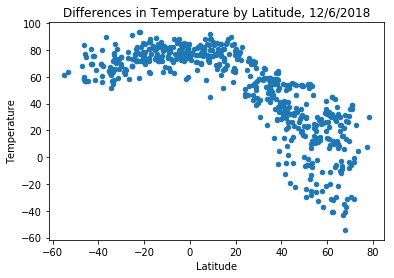

In [26]:
weather_df.plot(x="Latitude", y="Temperature", kind="scatter")
plt.title("Differences in Temperature by Latitude, 12/6/2018")
plt.savefig("Temperature")

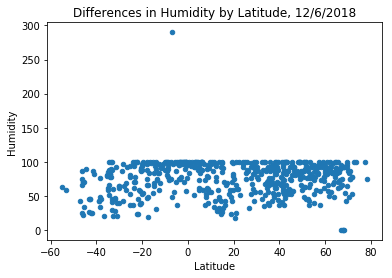

In [27]:
weather_df.plot(x="Latitude", y="Humidity", kind="scatter")
plt.title("Differences in Humidity by Latitude, 12/6/2018")
plt.savefig("Humidity")

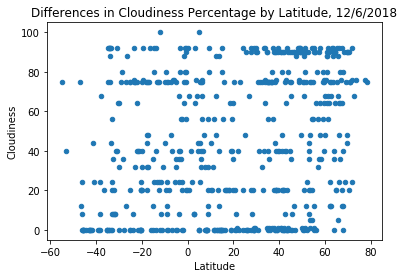

In [28]:
weather_df.plot(x="Latitude", y="Cloudiness", kind="scatter")
plt.title("Differences in Cloudiness Percentage by Latitude, 12/6/2018")
plt.savefig("Cloudiness")

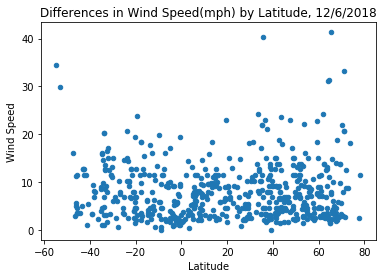

In [29]:
weather_df.plot(x="Latitude", y="Wind Speed", kind="scatter")
plt.title("Differences in Wind Speed(mph) by Latitude, 12/6/2018")
plt.savefig("Wind_Speed")

In [25]:
weather_df.to_csv("weather_df.csv", encoding="utf-8", index=True)